### Installs and imports

In [1]:
import pathlib
import mne
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Age distribution

<AxesSubplot:>

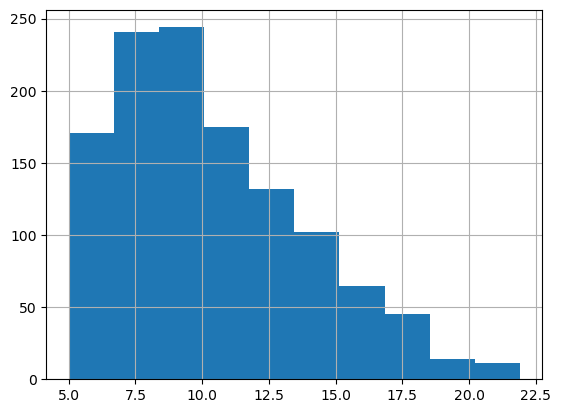

In [3]:
competition_data_path = pathlib.Path("/home/tschw/Documents/Neuroengineering/NTX/competition_data/EEG_preprocessed/training/")
subj_df = pd.read_csv(competition_data_path / "train_subjects.csv")

subj_df["age"].hist()

### Sensor location

In [5]:
example_raw = mne.io.read_raw_fif("/home/tschw/Documents/Neuroengineering/NTX/competition_data/validation/recordings/subj1201_EC_raw.fif.gz")
montage = example_raw.get_montage()
ch_pos = montage.get_positions()
ch_pos = ch_pos["ch_pos"]
xyz = np.array(list(ch_pos.values()))


Opening raw data file /home/tschw/Documents/Neuroengineering/NTX/competition_data/validation/recordings/subj1201_EC_raw.fif.gz...
    Range : 18 ... 19997 =      0.036 ...    39.994 secs
Ready.


### Inspect sensor statistics

Check the sensor statistics - how often was a channel location detected as bad in the preprocessing?

In [6]:
bad_chs = np.load(competition_data_path.parent.parent / "bad_chans.npy", allow_pickle=True)
bad_chs_dict = bad_chs.reshape(-1, 1)[0, 0]
bad_chs_keys = np.array(list(bad_chs_dict.keys()))
n_bad_chs = []
for ch, n_bads in bad_chs_dict.items():
    n_bad_chs.append(n_bads)

n_bad_chs = np.array(n_bad_chs)
indices = np.argsort(n_bad_chs)
bad_chs_keys[indices]

array(['E50', 'E16', 'E41', 'E35', 'E58', 'E20', 'E39', 'E123', 'E38',
       'E24', 'E40', 'E45', 'E23', 'E28', 'E57', 'E46', 'E101', 'E34',
       'E51', 'E122', 'E29', 'E117', 'E100', 'E18', 'E108', 'E11', 'E42',
       'E116', 'E9', 'E64', 'E3', 'E96', 'E19', 'E47', 'E65', 'E27',
       'E102', 'E121', 'E124', 'E90', 'E97', 'E4', 'E15', 'E33', 'E59',
       'E32', 'E12', 'E109', 'E52', 'E95', 'E89', 'E115', 'E26', 'E36',
       'E22', 'E118', 'E103', 'E2', 'E5', 'E68', 'E125', 'E111', 'E99',
       'E98', 'E13', 'E110', 'E43', 'E91', 'E69', 'E63', 'E120', 'E70',
       'E93', 'E14', 'E66', 'E92', 'E21', 'E94', 'E83', 'E73', 'E104',
       'E1', 'E128', 'E74', 'E60', 'E44', 'E82', 'E6', 'E88', 'E30',
       'E81', 'E112', 'E53', 'E17', 'E84', 'E114', 'E8', 'E37', 'E75',
       'E105', 'E25', 'E85', 'E49', 'E76', 'E87', 'E71', 'E113', 'E86',
       'E56', 'E10', 'E107', 'E119', 'E77', 'E48', 'E7', 'E61', 'E72',
       'E106', 'E126', 'E80', 'E31', 'E54', 'E78', 'E127', 'E79', 'E67',


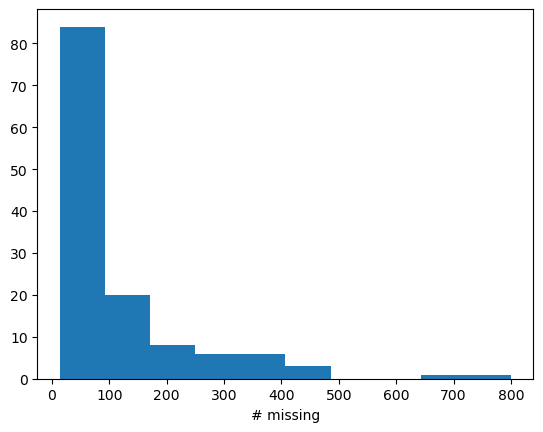

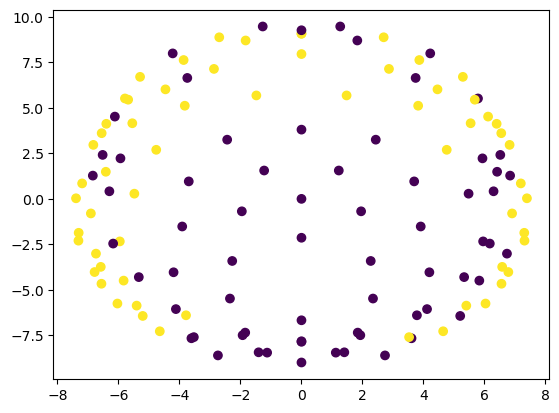

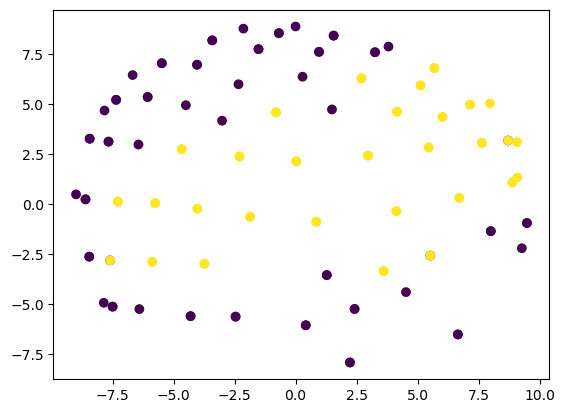

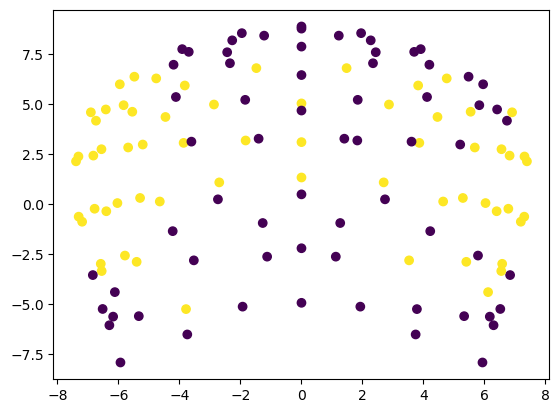

In [7]:
ch_mask = np.zeros_like(n_bad_chs)
ch_mask[n_bad_chs<62] = 1

plt.hist(n_bad_chs)
plt.xlabel("# missing")
plt.show()
plt.scatter(xyz[:, 0], xyz[:, 1], c=ch_mask)
plt.show()
plt.scatter(xyz[:, 1], xyz[:, 2], c=ch_mask)
plt.show()
plt.scatter(xyz[:, 0], xyz[:, 2], c=ch_mask)